In [3]:
# Gaussian mixtires
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.9, 0.5], [0.32, 0.9]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [-3, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
print(gm.fit(X))
print(gm.weights_)
print(gm.means_)
print(gm.covariances_)
print(gm.converged_)
print(gm.n_iter_)
print(gm.predict(X))
print(gm.predict_proba(X))

GaussianMixture(n_components=3, n_init=10, random_state=42)
[0.20006149 0.39952355 0.40041496]
[[-5.50359125  1.03338795]
 [ 0.08100028  0.10270496]
 [ 2.33307983 -1.56527975]]
[[[0.99896872 0.01751001]
  [0.01751001 0.94447856]]

 [[0.86461822 0.74843066]
  [0.74843066 1.12543691]]

 [[0.84418589 0.67709814]
  [0.67709814 1.00759623]]]
True
2
[1 1 2 ... 0 0 0]
[[1.87994457e-10 9.99999260e-01 7.39967084e-07]
 [7.41402789e-11 9.99297475e-01 7.02525187e-04]
 [2.95623475e-12 1.25915341e-04 9.99874085e-01]
 ...
 [1.00000000e+00 3.06996288e-27 8.31190743e-59]
 [1.00000000e+00 1.22962586e-18 8.35124663e-47]
 [1.00000000e+00 1.45921082e-18 1.43020489e-45]]


In [44]:
resolution = 100
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
pdf_probas.sum()

0.8132483114026777

0.6931471805599453

In [54]:
np.log(2)

0.6931471805599453

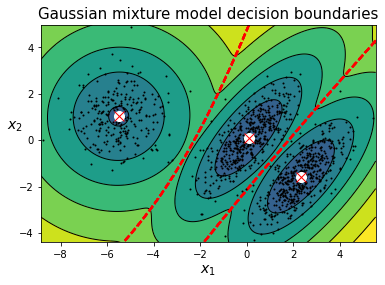

In [88]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2,12)
                )

    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')
        
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    centroid = clusterer.means_
    plt.plot(centroid[:,0],centroid[:,1],"wo",markersize=10)
    plt.plot(centroid[:,0],centroid[:,1],"rx",markersize=10)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title ("Gaussian mixture model decision boundaries",fontsize=15)
    

plot_gaussian_mixture(gm,X)

In [102]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.9, 0.5], [0.32, 0.9]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [-3, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]
#gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
aic_score =[]
bic_score =[]

for i in range (2,11):
    gm = GaussianMixture(n_components=i, n_init=10, random_state=42)
    gm.fit(X)
    aic_score.append(gm.aic(X))
    bic_score.append(gm.bic(X))    
    

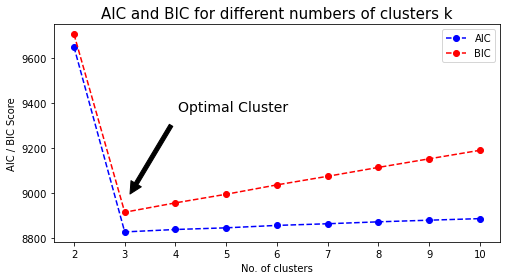

In [114]:
plt.figure(figsize=(8,4))
plt.plot(range(2,11),aic_score,"bo--",label="AIC")
plt.plot(range(2,11),bic_score,"ro--",label="BIC")
plt.annotate('Optimal Cluster',
             xy=(3, bic_score[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.xlabel("No. of clusters")
plt.ylabel("AIC / BIC Score")
plt.title("AIC and BIC for different numbers of clusters k", fontsize=15)
plt.legend()

In [118]:
# Finding the best covariance modle
min_val=np.infty
for i in range (2,11):
    for type in ("full","tied","spherical","diag"):
        gm = GaussianMixture(n_components=i, n_init=10, random_state=42,covariance_type=type).fit(X)
        bic_val = gm.bic(X)
        
        if bic_val < min_val:
            min_val=bic_val
            best_type = type

print(f"Best Covariance is: {best_type}")
print(f"Best BIC: {min_val}")

Best Covariance is: full
Best BIC: 8915.036762048332


In [117]:
# Bayesian Gaussian Mixture Models

from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)
np.round(bgm.weights_, 2)

array([0.4, 0.2, 0.4, 0. , 0. , 0. , 0. , 0. , 0. , 0. ])

Text(0.5, 1.0, 'weight_concentration_prior = 10000')

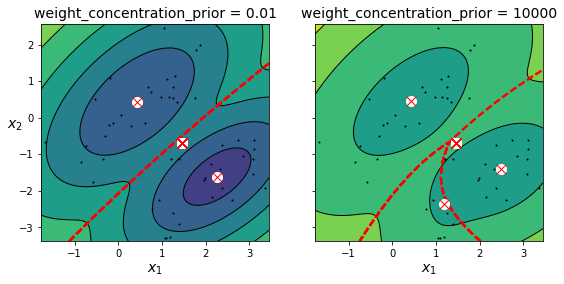

In [125]:
bgm_low = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1,
                                  weight_concentration_prior=0.01, random_state=42)
bgm_high = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1,
                                  weight_concentration_prior=10000, random_state=42)
nn=100
bgm_low.fit(X[:nn])
bgm_high.fit(X[:nn])
nn=50
plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_gaussian_mixture(bgm_low, X[:nn])
plt.title("weight_concentration_prior = 0.01", fontsize=14)
plt.subplot(122)
plot_gaussian_mixture(bgm_high, X[:nn], show_ylabels=False)
plt.title("weight_concentration_prior = 10000", fontsize=14)
